In [64]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt

In [65]:
sold_merged = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_merged.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string', 'po_box':'object'}, parse_dates = ['prev_sold_date'])

In [66]:
sold_merged.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city',
       'state', 'zip_code', 'house_size', 'prev_sold_date', 'county',
       'avgtemp', 'precipitation', 'maxtemp', 'mintemp', 'population',
       'density', 'po_box', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [67]:
sold_merged.dtypes

brokered_by              string[python]
price                           float64
bed                             float64
bath                            float64
acre_lot                        float64
street                   string[python]
city                             object
state                            object
zip_code                 string[python]
house_size                      float64
prev_sold_date           datetime64[ns]
county                           object
avgtemp                         float64
precipitation                   float64
maxtemp                         float64
mintemp                         float64
population                        int64
density                         float64
po_box                           object
dhighway                        float64
dlairport                       float64
dmairport                       float64
dshore                          float64
nobusiness                      float64
adjusted_gross_income             int64


In [68]:
# Begin to investigate missingness.
sold_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763205 entries, 0 to 763204
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   brokered_by            760227 non-null  string        
 1   price                  763205 non-null  float64       
 2   bed                    694758 non-null  float64       
 3   bath                   686865 non-null  float64       
 4   acre_lot               664038 non-null  float64       
 5   street                 760966 non-null  string        
 6   city                   763107 non-null  object        
 7   state                  763205 non-null  object        
 8   zip_code               763205 non-null  string        
 9   house_size             667089 non-null  float64       
 10  prev_sold_date         763205 non-null  datetime64[ns]
 11  county                 763205 non-null  object        
 12  avgtemp                763205 non-null  floa

<Axes: >

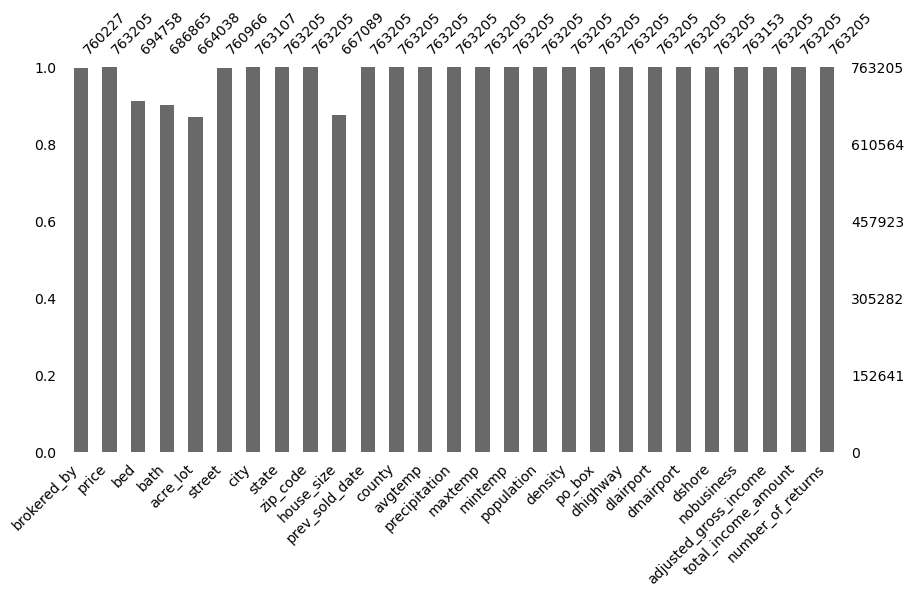

In [69]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

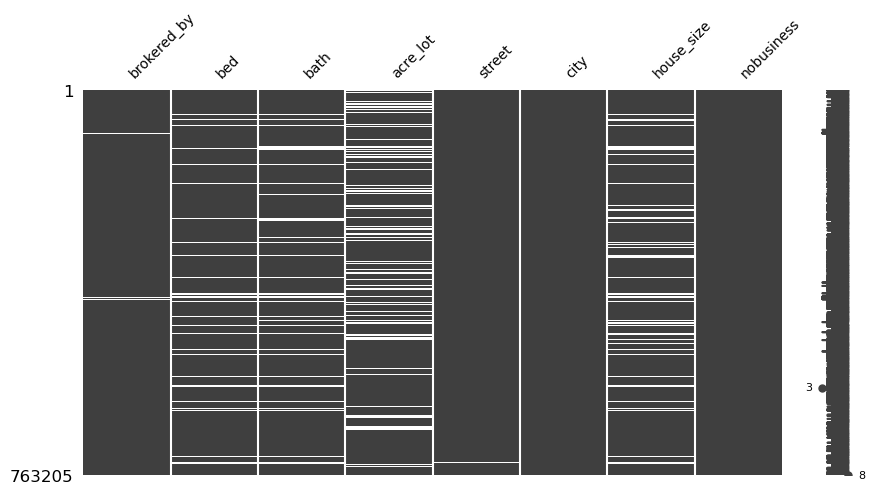

In [70]:
# See missingness patterns for variables with at least 1 missing value
missingno.matrix(sold_merged[['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'city', 'house_size', 'nobusiness']], figsize = (10,5), fontsize = 10)

<Axes: >

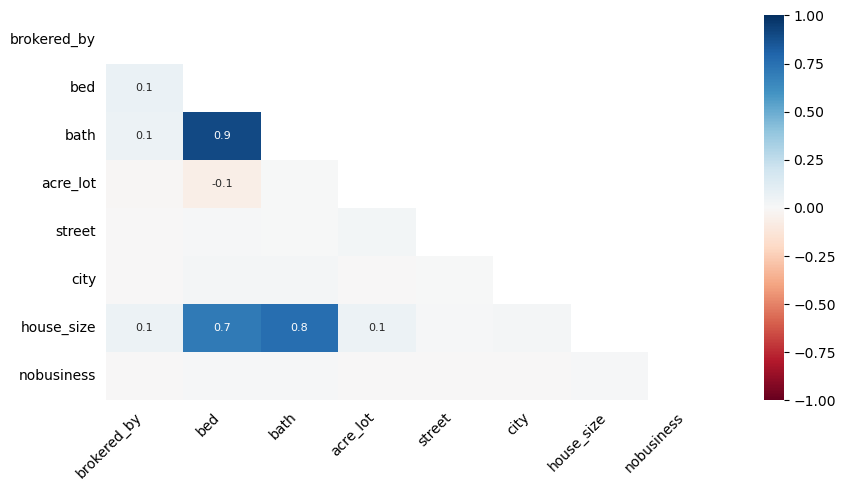

In [71]:
missingno.heatmap(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

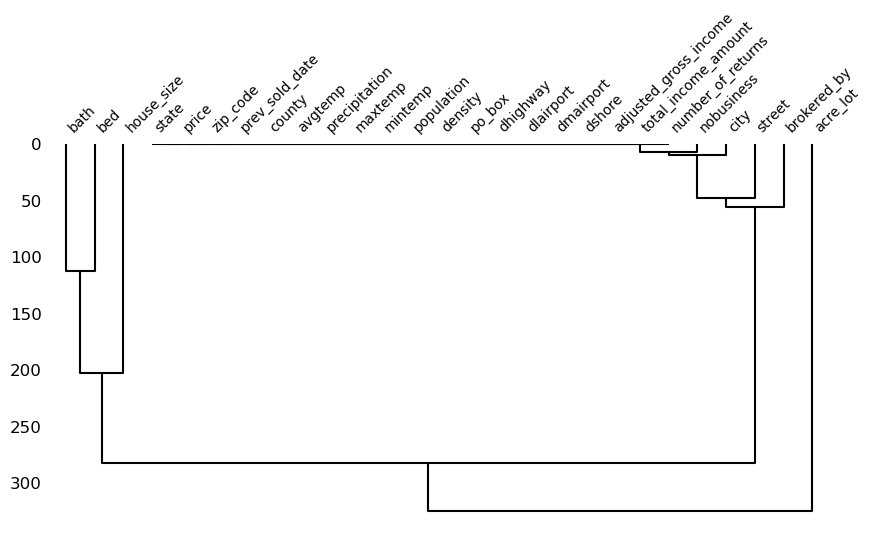

In [72]:
missingno.dendrogram(sold_merged, figsize = (10,5), fontsize = 10)

In [73]:
# Correlations to see if there are any strong ones which could be used for imputation
sold_merged.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size,avgtemp,precipitation,maxtemp,mintemp,population,density,dhighway,dlairport,dmairport,dshore,nobusiness,adjusted_gross_income,total_income_amount,number_of_returns
price,1.000000,0.212643,0.372301,0.004493,0.177943,0.027547,-0.130851,0.029354,0.024337,0.058553,0.181328,-0.060678,-0.124364,-0.057412,-0.113087,0.191364,0.338794,0.339069,0.067798
bed,0.212643,1.000000,0.650926,0.000767,0.315580,-0.025176,-0.005585,-0.018886,-0.031009,0.049179,-0.094725,-0.013015,0.013680,0.008198,0.024433,-0.059682,0.017484,0.017468,0.038898
bath,0.372301,0.650926,1.000000,-0.002201,0.382278,0.043945,0.029553,0.043149,0.043135,0.062293,-0.047591,-0.036321,-0.058066,-0.007394,-0.018570,0.049277,0.167357,0.167649,0.066004
acre_lot,0.004493,0.000767,-0.002201,1.000000,0.000420,-0.007597,-0.003892,-0.007023,-0.007977,-0.004063,-0.001239,0.002229,0.008620,-0.003589,-0.000476,-0.001539,-0.004053,-0.004053,-0.004329
house_size,0.177943,0.315580,0.382278,0.000420,1.000000,-0.009004,0.010956,-0.008427,-0.009193,0.000670,-0.031688,0.008854,0.002356,0.013856,0.015909,-0.001578,0.052299,0.052441,-0.000995
avgtemp,0.027547,-0.025176,0.043945,-0.007597,-0.009004,1.000000,-0.029621,0.983478,0.980186,0.198664,-0.010191,-0.062596,-0.183637,-0.120263,-0.090702,0.044528,0.088278,0.088041,0.190323
precipitation,-0.130851,-0.005585,0.029553,-0.003892,0.010956,-0.029621,1.000000,-0.152360,0.106175,-0.138789,-0.036539,0.013333,-0.112476,0.010530,-0.201906,-0.048371,-0.074332,-0.074497,-0.121389
maxtemp,0.029354,-0.018886,0.043149,-0.007023,-0.008427,0.983478,-0.152360,1.000000,0.928167,0.203412,-0.045010,-0.041268,-0.115426,-0.103921,0.013610,0.030335,0.069092,0.068876,0.189486
mintemp,0.024337,-0.031009,0.043135,-0.007977,-0.009193,0.980186,0.106175,0.928167,1.000000,0.185698,0.027675,-0.083581,-0.250990,-0.133487,-0.200474,0.058089,0.105452,0.105201,0.183773
population,0.058553,0.049179,0.062293,-0.004063,0.000670,0.198664,-0.138789,0.203412,0.185698,1.000000,0.225379,-0.275881,-0.198650,-0.257190,-0.073994,0.517063,0.566109,0.565635,0.985191


In [ ]:
# # Finding percentiles for bed and bathroom counts.
# # We may wish to cap outliers, and then for imputation bin house sizes into the number of bins equal to these caps.
# print('Bed 99th:', sold_merged.bed.quantile(0.99))
# print('Bath 99th:', sold_merged.bath.quantile(0.99))
# print('Acre 99th:', sold_merged.acre_lot.quantile(0.99))
# print('Size 99.5th:', sold_merged.house_size.quantile(0.995))
# print('Precipitation 99.9th:', sold_merged.precipitation.quantile(0.995))
# print('Highway 99.5th:', sold_merged.dhighway.quantile(0.995))
# print('Large airport 99.5th:', sold_merged.dlairport.quantile(0.95))
# print('Medium airport 99.5th:', sold_merged.dmairport.quantile(0.995))
# print('Shoreline 99.5th:', sold_merged.dshore.quantile(0.97))
# print('Business count 99.5th:', sold_merged.nobusiness.quantile(0.995))
# print('Gross income 99.5th:', sold_merged.adjusted_gross_income.quantile(0.995))
# print('Total income 99.5th:', sold_merged.total_income_amount.quantile(0.995))
# print('Tax return count 99.5th:', sold_merged.number_of_returns.quantile(0.995))

# print('Price 99.5th:', sold_merged.price.quantile(0.995))

Bed 99th: 6.0
Bath 99th: 6.0
Acre 99th: 37.10890000000014
Size 99.5th: 6405.0
Precipitation 99.9th: 98.39
Highway 99.5th: 99.0406999194664
Large airport 99.5th: 276.0337909073368
Medium airport 99.5th: 96.67301855825173
Shoreline 99.5th: 776.334156646791
Business count 99.5th: 2927.0
Gross income 99.5th: 7768285.0
Total income 99.5th: 7855178.0
Tax return count 99.5th: 46860.0
Price 99.5th: 3850000.0


In [ ]:
# # Finding percentiles for bed and bathroom counts.
# # We may wish to cap outliers, and then for imputation bin house sizes into the number of bins equal to these caps.
# print('Bed outliers:', len(sold_merged[sold_merged.bed > sold_merged.bed.quantile(0.99)]))
# print('Bath outliers:', len(sold_merged[sold_merged.bath > sold_merged.bath.quantile(0.99)]))
# print('Acre outliers:', len(sold_merged[sold_merged.acre_lot > sold_merged.acre_lot.quantile(0.99)]))
# print('Size outliers:', len(sold_merged[sold_merged.house_size > sold_merged.house_size.quantile(0.995)]))
# print('Precipitation outliers:', len(sold_merged[sold_merged.precipitation > sold_merged.precipitation.quantile(0.995)]))
# print('Highway distance outliers:', len(sold_merged[sold_merged.dhighway > sold_merged.dhighway.quantile(0.995)]))
# print('Large airport distance outliers:', len(sold_merged[sold_merged.dlairport > sold_merged.dlairport.quantile(0.995)]))
# print('Medium airport distance outliers:', len(sold_merged[sold_merged.dmairport > sold_merged.dmairport.quantile(0.995)]))
# print('Shoreline distance outliers:', len(sold_merged[sold_merged.dshore > sold_merged.dshore.quantile(0.995)]))
# print('Business count outliers:', len(sold_merged[sold_merged.nobusiness > sold_merged.nobusiness.quantile(0.995)]))
# print('Gross income outliers:', len(sold_merged[sold_merged.adjusted_gross_income > sold_merged.adjusted_gross_income.quantile(0.995)]))
# print('Total income outliers:', len(sold_merged[sold_merged.total_income_amount > sold_merged.total_income_amount.quantile(0.995)]))
# print('Tax return count outliers:', len(sold_merged[sold_merged.number_of_returns > sold_merged.number_of_returns.quantile(0.995)]))

# print('Price outliers:', len(sold_merged[sold_merged.price > sold_merged.price.quantile(0.995)]))

Bed outliers: 4308
Bath outliers: 3100
Acre outliers: 6641
Size outliers: 3334
Precipitation outliers: 1610
Highway distance outliers: 3761
Large airport distance outliers: 3803
Medium airport distance outliers: 3817
Shoreline distance outliers: 3804
Business count outliers: 3746
Gross income outliers: 3730
Total income outliers: 3730
Tax return count outliers: 3781
Price outliers: 3814


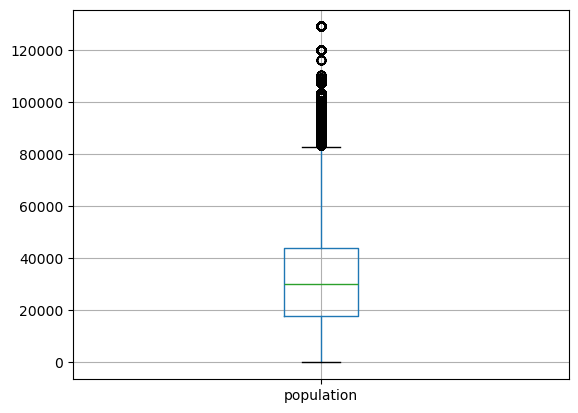

107864.0


In [106]:
x = 'population'
sold_merged.boxplot(x)
plt.show()
print(sold_merged[x].quantile(0.998))
# plt.hlines(y = sold_merged[x].quantile(0.975), xmin = 0.5, xmax = 1.5)

# avgtemp no boxplot outliers
# precipitation upper whisker is approx 100, there are a small number of boxplot outliers under 120 (Cap at 100, not a percentile, such a small number)
# mintemp no boxplot outliers
# maxtemp no boxplot outliers
# population upper whisker around 80k, outliers approaching 130k
# density many bad outliers far from the upper whisker, upper whisker at around 4000 while outlirs approach 60000
# dhighway many bad outliers again, upper whisker around 300 while one outlier is over 500
# dlairport many bad outliers again, upper whisker around 230, outliers go above 1000
# dmairport third whisker around 65, outliers over 175
# dshore .95

In [16]:
sold_merged.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city',
       'state', 'zip_code', 'house_size', 'prev_sold_date', 'county',
       'avgtemp', 'precipitation', 'maxtemp', 'mintemp', 'population',
       'density', 'po_box', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns', 'capped_bed', 'capped_bath', 'capped_acre',
       'capped_size', 'capped_precip', 'capped_highway', 'capped_lairport',
       'capped_mairport', 'capped_shore'],
      dtype='object')

Text(0, 0.5, 'Price ($)')

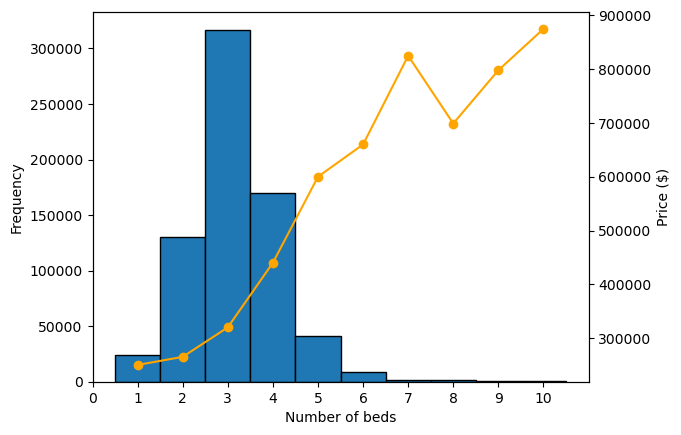

In [17]:
# Bedroom univariate
fig, ax = plt.subplots()

ax.hist(sold_merged[sold_merged.bed <= sold_merged.bed.quantile(0.999)].bed, ec = 'black', bins = np.arange(0,sold_merged.bed.quantile(0.999)+1)+0.5)
prices = [sold_merged[sold_merged.bed == x].price.median() for x in np.arange(1,sold_merged.bed.quantile(0.999)+1)]
ax.set_xticks(ticks = np.arange(0,11), labels = np.arange(0,11))
ax.set_xlabel('Number of beds')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(np.arange(1,sold_merged.bed.quantile(0.999)+1), prices, color = 'orange')
ax2.scatter(np.arange(1,sold_merged.bed.quantile(0.999)+1), prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

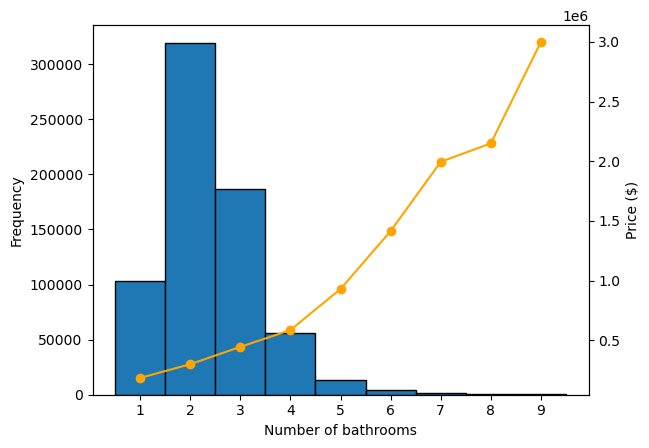

In [18]:
# Bathroom univariate
fig, ax = plt.subplots()

ax.hist(sold_merged[sold_merged.bath <= sold_merged.bed.quantile(0.999)].bath, ec = 'black', bins = np.arange(0,sold_merged.bath.quantile(0.999)+1)+0.5)
prices = [sold_merged[sold_merged.bath == x].price.median() for x in np.arange(1,sold_merged.bath.quantile(0.999)+1)]
ax.set_xticks(ticks = np.arange(0,10), labels = np.arange(0,10))
ax.set_xlabel('Number of bathrooms')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(np.arange(1,sold_merged.bath.quantile(0.999)+1), prices, color = 'orange')
ax2.scatter(np.arange(1,sold_merged.bath.quantile(0.999)+1), prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

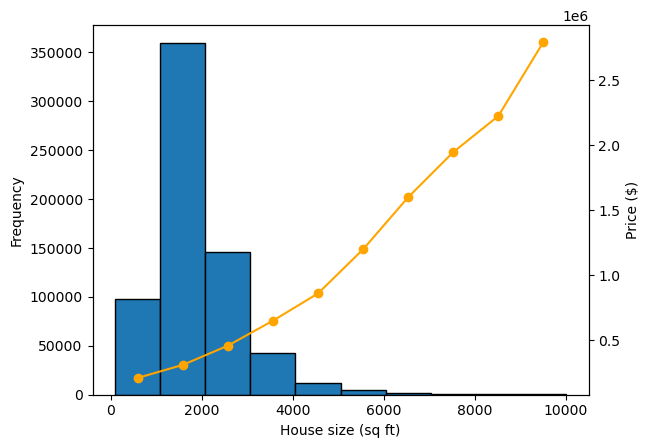

In [19]:
# House size univariate
fig, ax = plt.subplots()

hist_size = ax.hist(sold_merged[sold_merged.house_size <= sold_merged.house_size.quantile(0.999)].house_size, ec = 'black')
midpts = [((hist_size[1][x] + hist_size[1][x+1])/2) for x in range(len(hist_size[1])-1)]
prices = [sold_merged[(sold_merged.house_size >= hist_size[1][x]) & (sold_merged.house_size < hist_size[1][x+1])].price.median() for x in range(len(hist_size[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('House size (sq ft)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

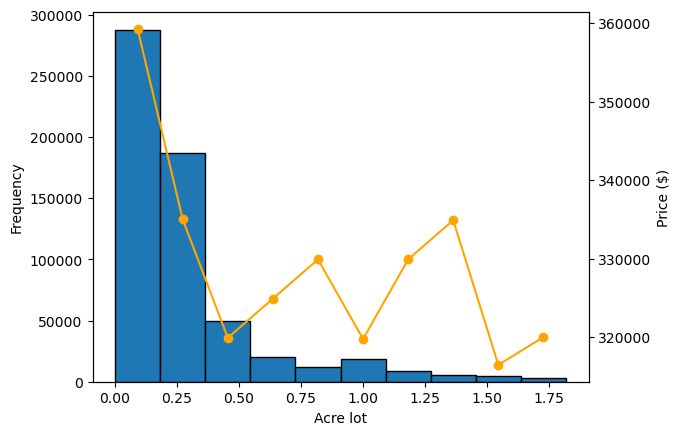

In [20]:
# Acre lot univariate
fig, ax = plt.subplots()

hist_acre = ax.hist(sold_merged[sold_merged.acre_lot <= sold_merged.acre_lot.quantile(0.9)].acre_lot, ec = 'black')
midpts = [((hist_acre[1][x] + hist_acre[1][x+1])/2) for x in range(len(hist_acre[1])-1)]
prices = [sold_merged[(sold_merged.acre_lot >= hist_acre[1][x]) & (sold_merged.acre_lot < hist_acre[1][x+1])].price.median() for x in range(len(hist_acre[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Acre lot')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

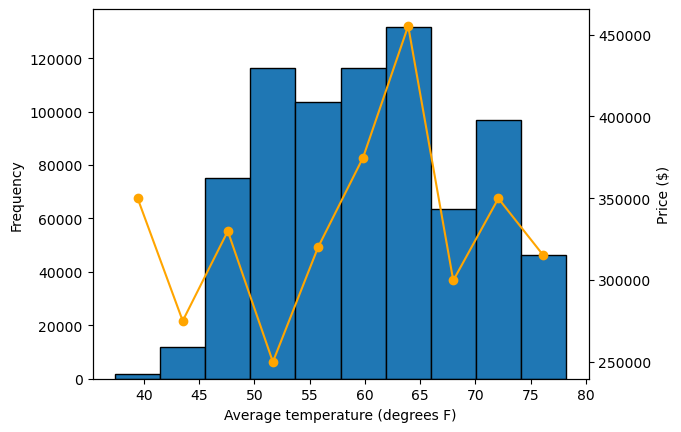

In [21]:
# Average temp univariate
fig, ax = plt.subplots()

hist_avgtemp = ax.hist(sold_merged.avgtemp, ec = 'black')
midpts = [((hist_avgtemp[1][x] + hist_avgtemp[1][x+1])/2) for x in range(len(hist_avgtemp[1])-1)]
prices = [sold_merged[(sold_merged.avgtemp >= hist_avgtemp[1][x]) & (sold_merged.avgtemp < hist_avgtemp[1][x+1])].price.median() for x in range(len(hist_avgtemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Average temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

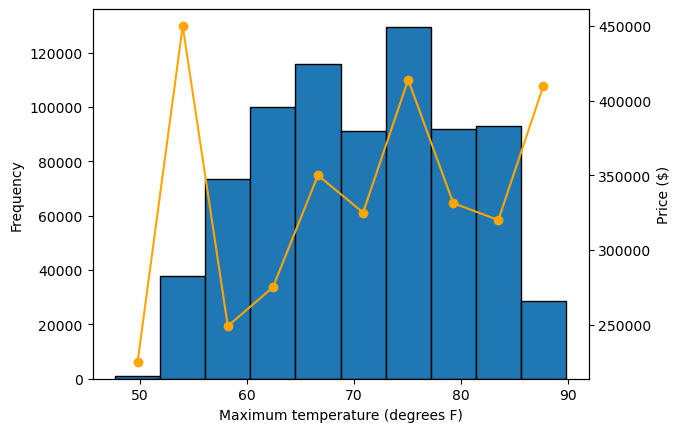

In [22]:
# Max temp univariate
fig, ax = plt.subplots()

hist_mintemp = ax.hist(sold_merged.maxtemp, ec = 'black')
midpts = [((hist_mintemp[1][x] + hist_mintemp[1][x+1])/2) for x in range(len(hist_mintemp[1])-1)]
prices = [sold_merged[(sold_merged.maxtemp >= hist_mintemp[1][x]) & (sold_merged.maxtemp < hist_mintemp[1][x+1])].price.median() for x in range(len(hist_mintemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Maximum temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

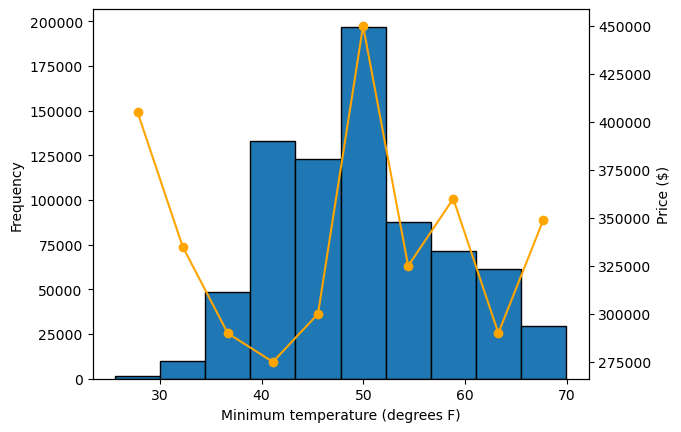

In [23]:
# Min temp univariate
fig, ax = plt.subplots()

hist_mintemp = ax.hist(sold_merged.mintemp, ec = 'black')
midpts = [((hist_mintemp[1][x] + hist_mintemp[1][x+1])/2) for x in range(len(hist_mintemp[1])-1)]
prices = [sold_merged[(sold_merged.mintemp >= hist_mintemp[1][x]) & (sold_merged.mintemp < hist_mintemp[1][x+1])].price.median() for x in range(len(hist_mintemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Minimum temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

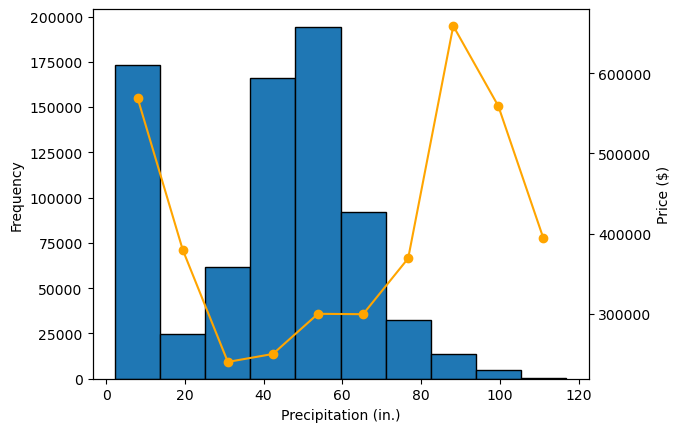

In [24]:
# Precipitation univariate
fig, ax = plt.subplots()

hist_precip = ax.hist(sold_merged.precipitation, ec = 'black')
midpts = [((hist_precip[1][x] + hist_precip[1][x+1])/2) for x in range(len(hist_precip[1])-1)]
prices = [sold_merged[(sold_merged.precipitation >= hist_precip[1][x]) & (sold_merged.precipitation < hist_precip[1][x+1])].price.median() for x in range(len(hist_precip[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Precipitation (in.)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

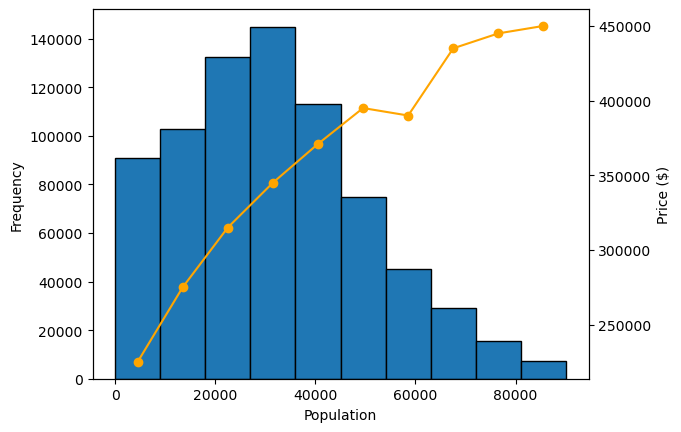

In [109]:
# Population univariate
fig, ax = plt.subplots()

hist_pop = ax.hist(sold_merged[sold_merged.population <= sold_merged.population.quantile(0.99)].population, ec = 'black')
midpts = [((hist_pop[1][x] + hist_pop[1][x+1])/2) for x in range(len(hist_pop[1])-1)]
prices = [sold_merged[(sold_merged.population >= hist_pop[1][x]) & (sold_merged.population < hist_pop[1][x+1])].price.median() for x in range(len(hist_pop[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Population')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

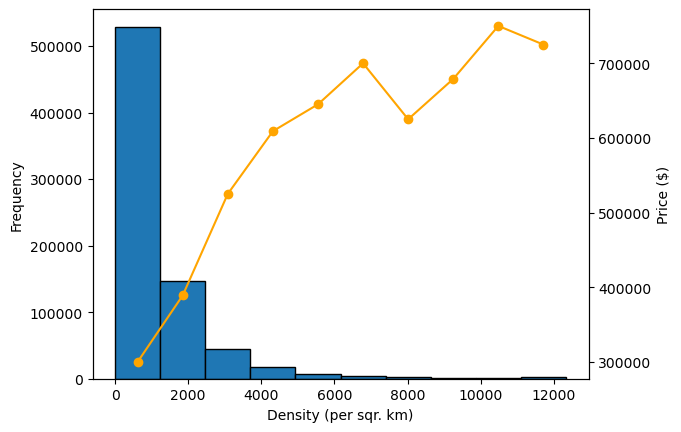

In [25]:
# Density univariate
fig, ax = plt.subplots()

hist_density = ax.hist(sold_merged[sold_merged.density <= sold_merged.density.quantile(0.99)].density, ec = 'black')
midpts = [((hist_density[1][x] + hist_density[1][x+1])/2) for x in range(len(hist_density[1])-1)]
prices = [sold_merged[(sold_merged.density >= hist_density[1][x]) & (sold_merged.density < hist_density[1][x+1])].price.median() for x in range(len(hist_density[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Density (per sqr. km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

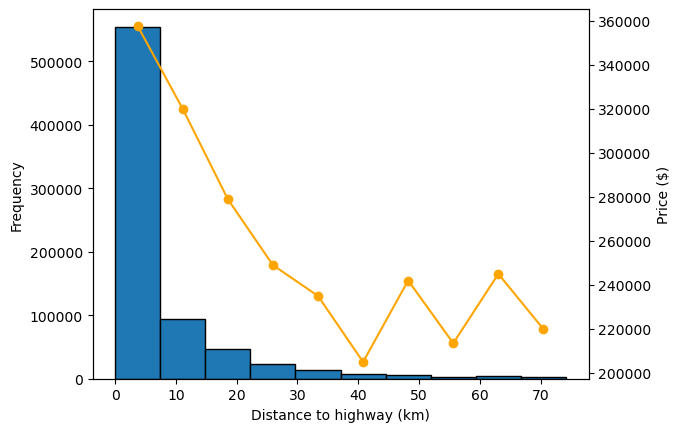

In [26]:
# Distance to highway univariate
fig, ax = plt.subplots()

hist_dhighway = ax.hist(sold_merged[sold_merged.dhighway <= sold_merged.dhighway.quantile(0.99)].dhighway, ec = 'black')
midpts = [((hist_dhighway[1][x] + hist_dhighway[1][x+1])/2) for x in range(len(hist_dhighway[1])-1)]
prices = [sold_merged[(sold_merged.dhighway >= hist_dhighway[1][x]) & (sold_merged.dhighway < hist_dhighway[1][x+1])].price.median() for x in range(len(hist_dhighway[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to highway (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

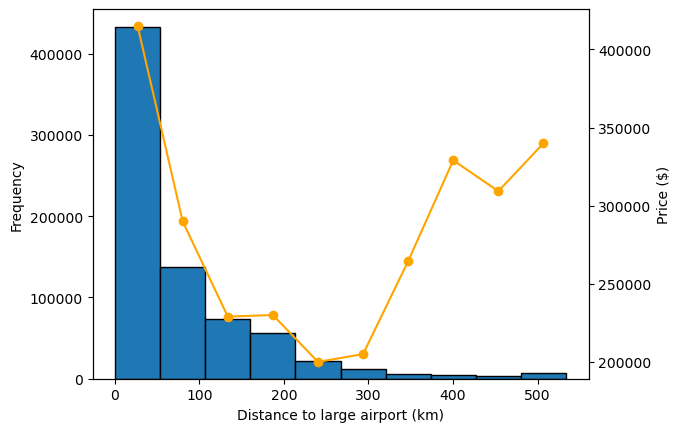

In [27]:
# Distance to large airport univariate
fig, ax = plt.subplots()

hist_lairport = ax.hist(sold_merged[sold_merged.dlairport <= sold_merged.dlairport.quantile(0.99)].dlairport, ec = 'black')
midpts = [((hist_lairport[1][x] + hist_lairport[1][x+1])/2) for x in range(len(hist_lairport[1])-1)]
prices = [sold_merged[(sold_merged.dlairport >= hist_lairport[1][x]) & (sold_merged.dlairport < hist_lairport[1][x+1])].price.median() for x in range(len(hist_lairport[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to large airport (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

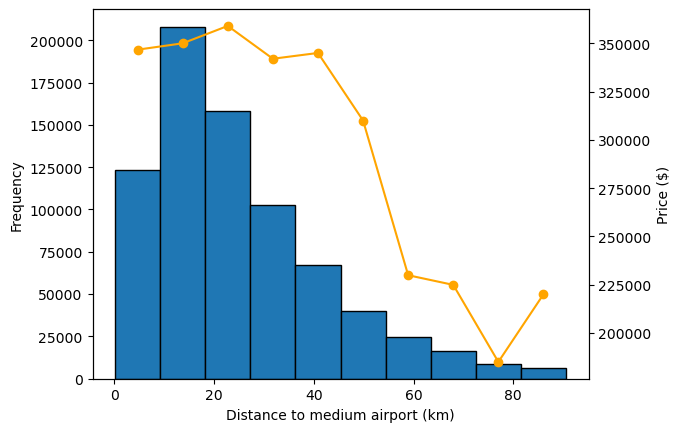

In [28]:
# Distance to medium airport univariate
fig, ax = plt.subplots()

hist_mairport = ax.hist(sold_merged[sold_merged.dmairport <= sold_merged.dmairport.quantile(0.99)].dmairport, ec = 'black')
midpts = [((hist_mairport[1][x] + hist_mairport[1][x+1])/2) for x in range(len(hist_mairport[1])-1)]
prices = [sold_merged[(sold_merged.dmairport >= hist_mairport[1][x]) & (sold_merged.dmairport < hist_mairport[1][x+1])].price.median() for x in range(len(hist_mairport[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to medium airport (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

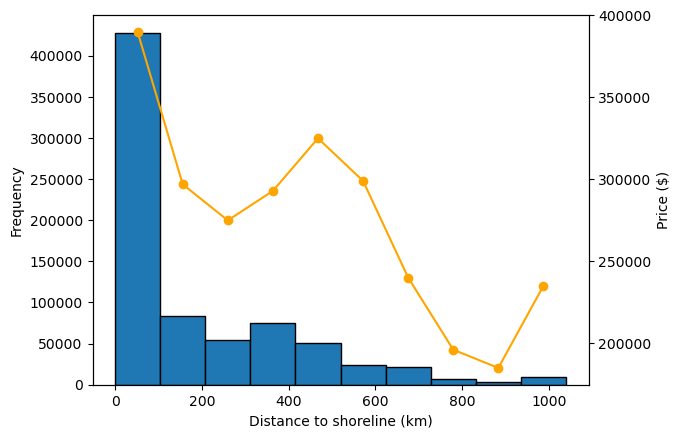

In [29]:
# Distance to shoreline univariate
fig, ax = plt.subplots()

hist_shoreline = ax.hist(sold_merged[sold_merged.dshore <= sold_merged.dshore.quantile(0.99)].dshore, ec = 'black')
midpts = [((hist_shoreline[1][x] + hist_shoreline[1][x+1])/2) for x in range(len(hist_shoreline[1])-1)]
prices = [sold_merged[(sold_merged.dshore >= hist_shoreline[1][x]) & (sold_merged.dshore < hist_shoreline[1][x+1])].price.median() for x in range(len(hist_shoreline[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to shoreline (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

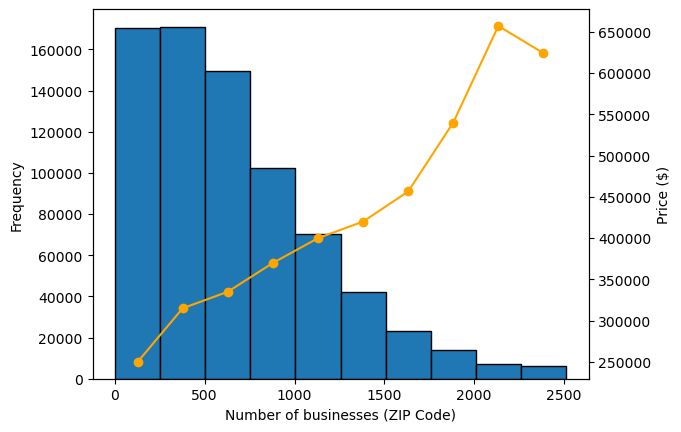

In [30]:
# Number of businesses univariate
fig, ax = plt.subplots()

hist_business = ax.hist(sold_merged[sold_merged.nobusiness <= sold_merged.nobusiness.quantile(0.99)].nobusiness, ec = 'black')
midpts = [((hist_business[1][x] + hist_business[1][x+1])/2) for x in range(len(hist_business[1])-1)]
prices = [sold_merged[(sold_merged.nobusiness >= hist_business[1][x]) & (sold_merged.nobusiness < hist_business[1][x+1])].price.median() for x in range(len(hist_business[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Number of businesses (ZIP Code)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

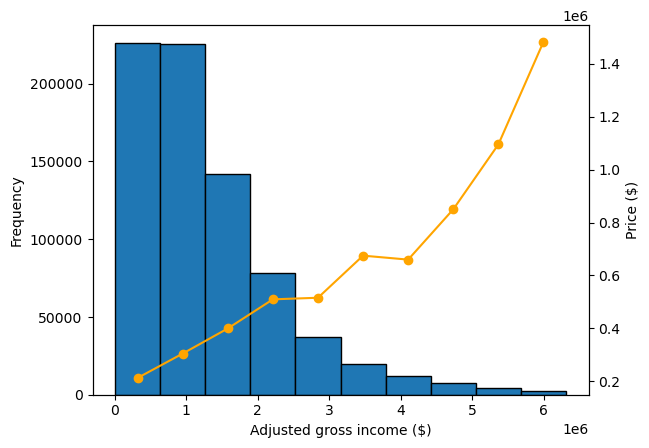

In [48]:
# Adjusted income univariate
fig, ax = plt.subplots()

hist_incomea = ax.hist(sold_merged[sold_merged.adjusted_gross_income <= sold_merged.adjusted_gross_income.quantile(0.99)].adjusted_gross_income, ec = 'black')
midpts = [((hist_incomea[1][x] + hist_incomea[1][x+1])/2) for x in range(len(hist_incomea[1])-1)]
prices = [sold_merged[(sold_merged.adjusted_gross_income >= hist_incomea[1][x]) & (sold_merged.adjusted_gross_income < hist_incomea[1][x+1])].price.median() for x in range(len(hist_incomea[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Adjusted gross income ($)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

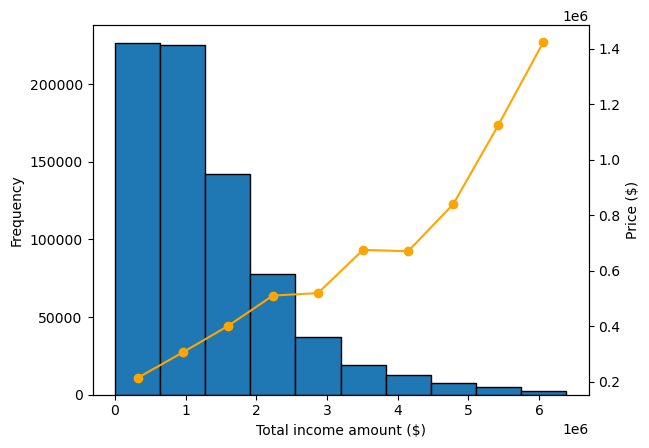

In [50]:
# Total income univariate
fig, ax = plt.subplots()

hist_incomet = ax.hist(sold_merged[sold_merged.total_income_amount <= sold_merged.total_income_amount.quantile(0.99)].total_income_amount, ec = 'black')
midpts = [((hist_incomet[1][x] + hist_incomet[1][x+1])/2) for x in range(len(hist_incomet[1])-1)]
prices = [sold_merged[(sold_merged.total_income_amount >= hist_incomet[1][x]) & (sold_merged.total_income_amount < hist_incomet[1][x+1])].price.median() for x in range(len(hist_incomet[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Total income amount ($)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

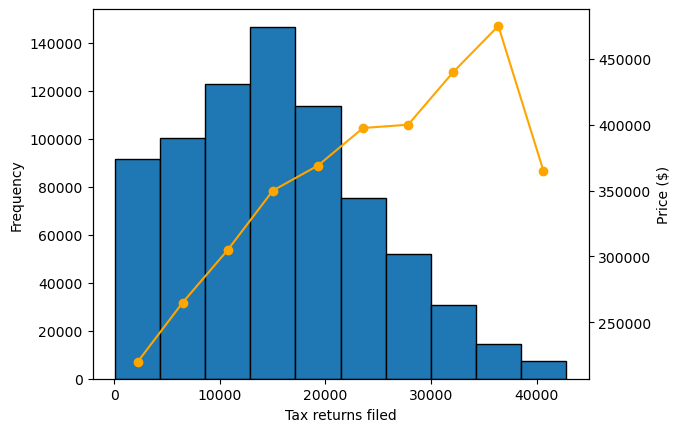

In [51]:
# Tax returns univariate
fig, ax = plt.subplots()

hist_treturns = ax.hist(sold_merged[sold_merged.number_of_returns <= sold_merged.number_of_returns.quantile(0.99)].number_of_returns, ec = 'black')
midpts = [((hist_treturns[1][x] + hist_treturns[1][x+1])/2) for x in range(len(hist_treturns[1])-1)]
prices = [sold_merged[(sold_merged.number_of_returns >= hist_treturns[1][x]) & (sold_merged.number_of_returns < hist_treturns[1][x+1])].price.median() for x in range(len(hist_treturns[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Tax returns filed')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Price ($)')

In [31]:
sold_merged.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city',
       'state', 'zip_code', 'house_size', 'prev_sold_date', 'county',
       'avgtemp', 'precipitation', 'maxtemp', 'mintemp', 'population',
       'density', 'po_box', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns', 'capped_bed', 'capped_bath', 'capped_acre',
       'capped_size', 'capped_precip', 'capped_highway', 'capped_lairport',
       'capped_mairport', 'capped_shore'],
      dtype='object')

In [32]:
def cap_outliers(column, percentile):
    col = sold_merged[column]
    cap = col.quantile(percentile)
    print('Capped ', column, ' on the ', percentile*100, 'th percentile (', cap, ')', sep = '')
    return col.apply(lambda x: cap if x > cap else x)

In [ ]:
# # In advance of outlier capping, add a flag to say it was done
# sold_merged['capped_bed'] = (sold_merged['bed'] > sold_merged.bed.quantile(0.99)).astype('int')
# sold_merged['capped_bath'] = (sold_merged['bath'] > sold_merged.bath.quantile(0.99)).astype('int')
# sold_merged['capped_acre'] = (sold_merged['acre_lot'] > sold_merged.acre_lot.quantile(0.99)).astype('int')
# sold_merged['capped_size'] = (sold_merged['house_size'] > sold_merged.house_size.quantile(0.995)).astype('int')
# sold_merged['capped_precip'] = (sold_merged['precipitation'] > sold_merged.precipitation.quantile(0.95)).astype('int')
# sold_merged['capped_highway'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')
# sold_merged['capped_lairport'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')
# sold_merged['capped_mairport'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')
# sold_merged['capped_shore'] = (sold_merged['dhighway'] > sold_merged.dhighway.quantile(0.99)).astype('int')

In [33]:
sold_merged['treated_bed'] = cap_outliers('bed', 0.99)
sold_merged['treated_bath'] = cap_outliers('bath', 0.99)
sold_merged['treated_acre'] = cap_outliers('acre_lot', 0.95)
sold_merged['treated_size'] = cap_outliers('house_size', 0.995)

Capped bed on the 99.0th percentile (6.0)
Capped bath on the 99.0th percentile (6.0)
Capped acre_lot on the 95.0th percentile (5.0)
Capped house_size on the 99.5th percentile (6405.0)


In [34]:
sold_merged.isna().sum()

brokered_by               2978
price                        0
bed                      68447
bath                     76340
acre_lot                 99167
street                    2239
city                        98
state                        0
zip_code                     0
house_size               96116
prev_sold_date               0
county                       0
avgtemp                      0
precipitation                0
maxtemp                      0
mintemp                      0
population                   0
density                      0
po_box                       0
dhighway                     0
dlairport                    0
dmairport                    0
dshore                       0
nobusiness                  52
adjusted_gross_income        0
total_income_amount          0
number_of_returns            0
capped_bed                   0
capped_bath                  0
capped_acre                  0
capped_size                  0
capped_precip                0
capped_h

In [35]:
# In advance of any imputation, add a flag to say if the value was originally missing
sold_merged['missing_bed'] = sold_merged['bed'].isna().astype('int')
sold_merged['missing_bath'] = sold_merged['bath'].isna().astype('int')
sold_merged['missing_acre'] = sold_merged['acre_lot'].isna().astype('int')
sold_merged['missing_size'] = sold_merged['house_size'].isna().astype('int')
sold_merged['missing_business'] = sold_merged['nobusiness'].isna().astype('int')
sold_merged['missing_city'] = sold_merged['city'].isna().astype('int')
sold_merged['missing_street'] = sold_merged['street'].isna().astype('int')
sold_merged['missing_brokerage'] = sold_merged['brokered_by'].isna().astype('int')

<Axes: >

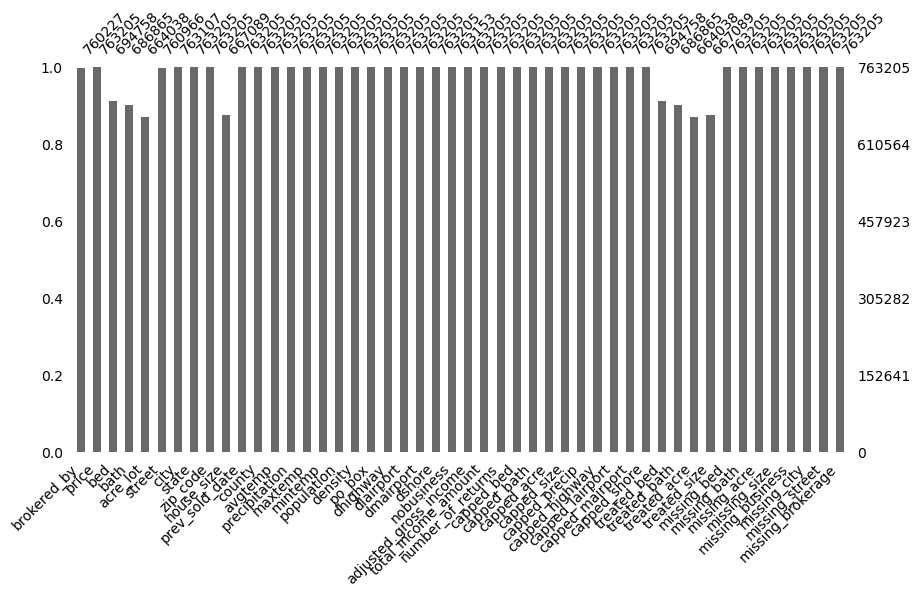

In [36]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)

In [37]:
# Filling missing bed values where house_size is present
bed1_size_med = sold_merged[sold_merged.bed == 1].house_size.median()
bed2_size_med = sold_merged[sold_merged.bed == 2].house_size.median()
bed3_size_med = sold_merged[sold_merged.bed == 3].house_size.median()
bed4_size_med = sold_merged[sold_merged.bed == 4].house_size.median()
bed5_size_med = sold_merged[sold_merged.bed == 5].house_size.median()
bed6_size_med = sold_merged[sold_merged.bed == 6].house_size.median()
print(bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med)
# We will compare the house_size for these rows against the medians and impute bed number based on which is closest.
# Get indices of relevant rows.
indices = sold_merged[(sold_merged.bed.isna()) & (sold_merged.house_size.notna())].index
# Form list of medians.
medians = [bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med]
# Impute for the relevant rows.
for n in indices:
    size = sold_merged.house_size[n]
    diffs = [abs(size - x) for x in medians]
    sold_merged.loc[n, 'treated_bed'] = np.argmin(diffs)+1

747.0 1148.0 1595.0 2262.0 3073.0 3500.0


In [38]:
# Filling missing bath values where house_size is present
bath1_size_med = sold_merged[sold_merged.bath == 1].house_size.median()
bath2_size_med = sold_merged[sold_merged.bath == 2].house_size.median()
bath3_size_med = sold_merged[sold_merged.bath == 3].house_size.median()
bath4_size_med = sold_merged[sold_merged.bath == 4].house_size.median()
bath5_size_med = sold_merged[sold_merged.bath == 5].house_size.median()
bath6_size_med = sold_merged[sold_merged.bath == 6].house_size.median()
print(bath1_size_med, bath2_size_med, bath3_size_med, bath4_size_med, bath5_size_med, bath6_size_med)
# We will compare the house_size for these rows against the medians and impute bath number based on which is closest.
# Get indices of relevant rows.
indices = sold_merged[(sold_merged.bath.isna()) & (sold_merged.house_size.notna())].index
# Form list of medians.
medians = [bath1_size_med, bath2_size_med, bath3_size_med, bath4_size_med, bath5_size_med, bath6_size_med]
# Impute for the relevant rows.
for n in indices:
    size = sold_merged.house_size[n]
    diffs = [abs(size - x) for x in medians]
    sold_merged.loc[n, 'treated_bath'] = np.argmin(diffs)+1

1000.0 1506.0 2180.0 2994.0 4037.0 4927.5


In [39]:
# Filling missing bed values where bath is present
bed1_size_med = sold_merged[sold_merged.bed == 1].bath.median()
bed2_size_med = sold_merged[sold_merged.bed == 2].bath.median()
bed3_size_med = sold_merged[sold_merged.bed == 3].bath.median()
bed4_size_med = sold_merged[sold_merged.bed == 4].bath.median()
bed5_size_med = sold_merged[sold_merged.bed == 5].bath.median()
bed6_size_med = sold_merged[sold_merged.bed == 6].bath.median()
print(bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med)
# We will compare the house_size for these rows against the medians and impute bed number based on which is closest.
# Get indices of relevant rows.
# indices = sold_merged[(sold_merged.bed.isna()) & (sold_merged.house_size.notna())].index
# # Form list of medians.
# medians = [bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med]
# # Impute for the relevant rows.
# for n in indices:
#     size = sold_merged.house_size[n]
#     diffs = [abs(size - x) for x in medians]
#     sold_merged.loc[n, 'treated_bed'] = np.argmin(diffs)+1

1.0 2.0 2.0 3.0 3.0 4.0


In [41]:
bed_med = sold_merged.bed.median()
bath_med = sold_merged.bath.median()
acre_med = sold_merged.acre_lot.median()
size_med = sold_merged.house_size.median()
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~(sold_merged['missing_bed'] == 1), bed_med)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~(sold_merged['missing_bath'] == 1), bath_med)
sold_merged['treated_acre'] = sold_merged['treated_acre'].where(~(sold_merged['missing_acre'] == 1), acre_med)
sold_merged['treated_size'] = sold_merged['treated_size'].where(~(sold_merged['missing_size'] == 1), size_med)

<Axes: >

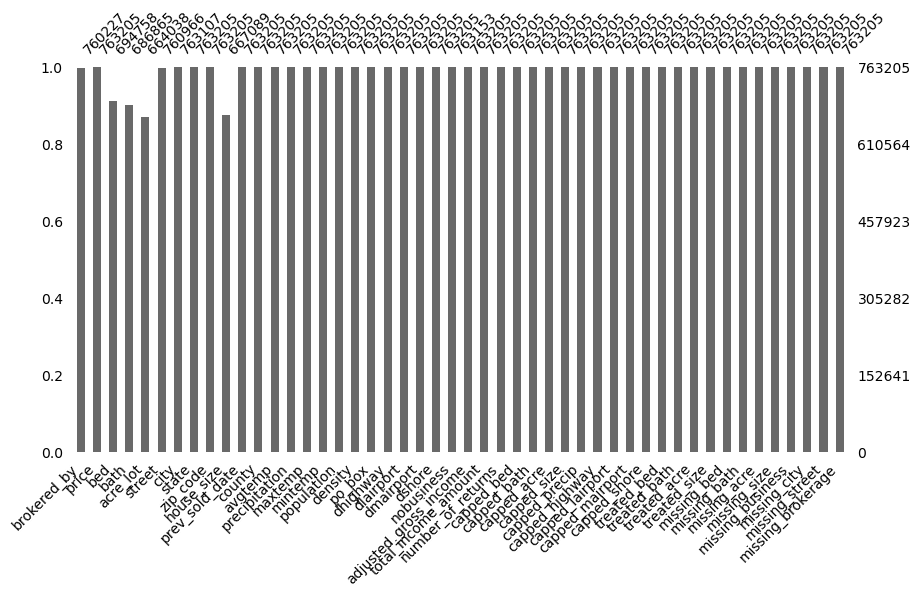

In [56]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)